# 01_NBS_ Exploratory Data Analysis - EDA & Fraud Detection

## Purpose

The purpose of this notebook is to make some data exploration to undertand the data, and check the types of the data and the terminology we want to discover (e.g. data distribution, feature correlation, feature selection, unbalenced dataset, etc).

## Methodology
The approach used to made this EDA are: data visualization, feature correlation, feature selection, unbalenced dataset, XGBoost algorithm.

## WIP - improvements
Use this section only if the notebook is not final.

Notable TODOs:
- Data Visualization;
- Feature Correlation;
- Unbalenced dataset technique;
- XGBoost algorithm.

## Results
TO do.

## Suggested next steps
- Understand the transaction trends over time (can a forecasting problem?);

# Library Import and Setup

## Library Import

In [77]:
import pandas as pd
import numpy as np
from itertools import cycle

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import PrecisionRecallDisplay

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Setup

In [3]:
data_path = "../data/creditcard.csv"

# Load DataFrame

In [4]:
df = pd.read_csv(data_path)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data Exploration

## Get Dataset Description

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


The dataset contains only numerical variables.

- Features V1, V2, ..., V28: are the principal components obtained by the PCA;
- Time: contains the seconds elapsed between each transaction and the first in the dataset;
- Amount: can be used for example-dependent cost-sensitive learning;
- Class: is the response variable and it takes value 1 in case of fraud and 0 otherwise.



In [7]:
print(f"Number of features: {df.shape[1]}")
print(f"Number of samples: {df.shape[0]}")

Number of features: 31
Number of samples: 284807


## Get class Distribution

In [12]:
print(f"Number of Normal Transaction: {df['Class'].value_counts()[0]}")
print(f"Number of Fraudlent Transaction: {df['Class'].value_counts()[1]}")

Number of Normal Transaction: 284315
Number of Fraudlent Transaction: 492


In [15]:
print(f"% of Normal Transaction: {round(df['Class'].value_counts()[0]/len(df)*100, 2)}%")
print(f"% of Fraudlent Transaction: {round(df['Class'].value_counts()[1]/len(df)*100, 2)}%")

% of Normal Transaction: 99.83%
% of Fraudlent Transaction: 0.17%


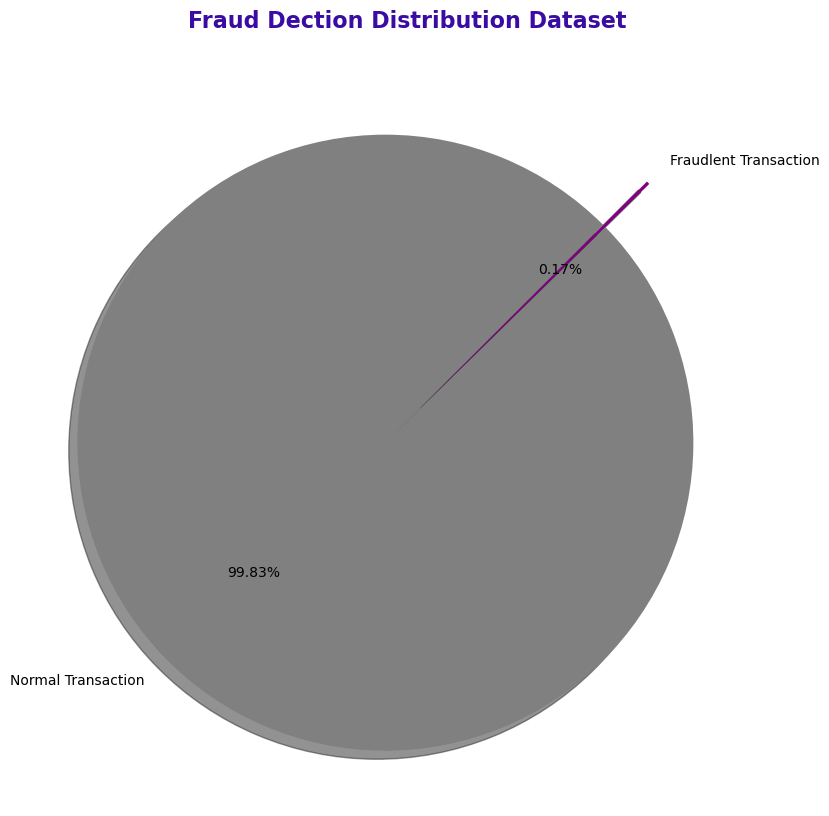

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.pie(x=df["Class"].value_counts().tolist(), 
          labels=["Normal Transaction", "Fraudlent Transaction"],
          autopct="%1.2f%%", shadow=True, startangle=45,
          explode=[0.1, 0.1], colors=["gray","purple"])
ax.set_title("Fraud Dection Distribution Dataset", fontdict={"fontsize": 16},
                fontweight="bold", color="#3a0ca3")
plt.show()

In other words we have unbalenced dataset and the accuracy metric is not appropriate for evaluate the metric. So the main metric will be: **Area Under the Precision-Recall Curve (AUPRC)**.

## Correlation

In [45]:
def plot_correlation():
    fig, ax = plt.subplots(2, 1, figsize=(20, 20))
    corr_feat = df.corr()
    (ax1, ax2) = ax
    corr_feat["Class"][:-1].plot(kind="bar", grid=False, color=["gray","purple"], ax=ax1)
    ax1.set_title("Feature Correlation")
    ax1.set_xlabel("Features")
    ax1.legend(["Normal Transaction", "Fraundlent Transaction"])
    mask = np.triu(np.ones_like(corr_feat, dtype=bool))
    sns.heatmap(corr_feat, mask=mask, robust=True, center=0,
                square=True, cmap="viridis", linewidths=.6,
                ax=ax2)
    ax2.set_title("Correlation of Spend Variables")
    plt.show()

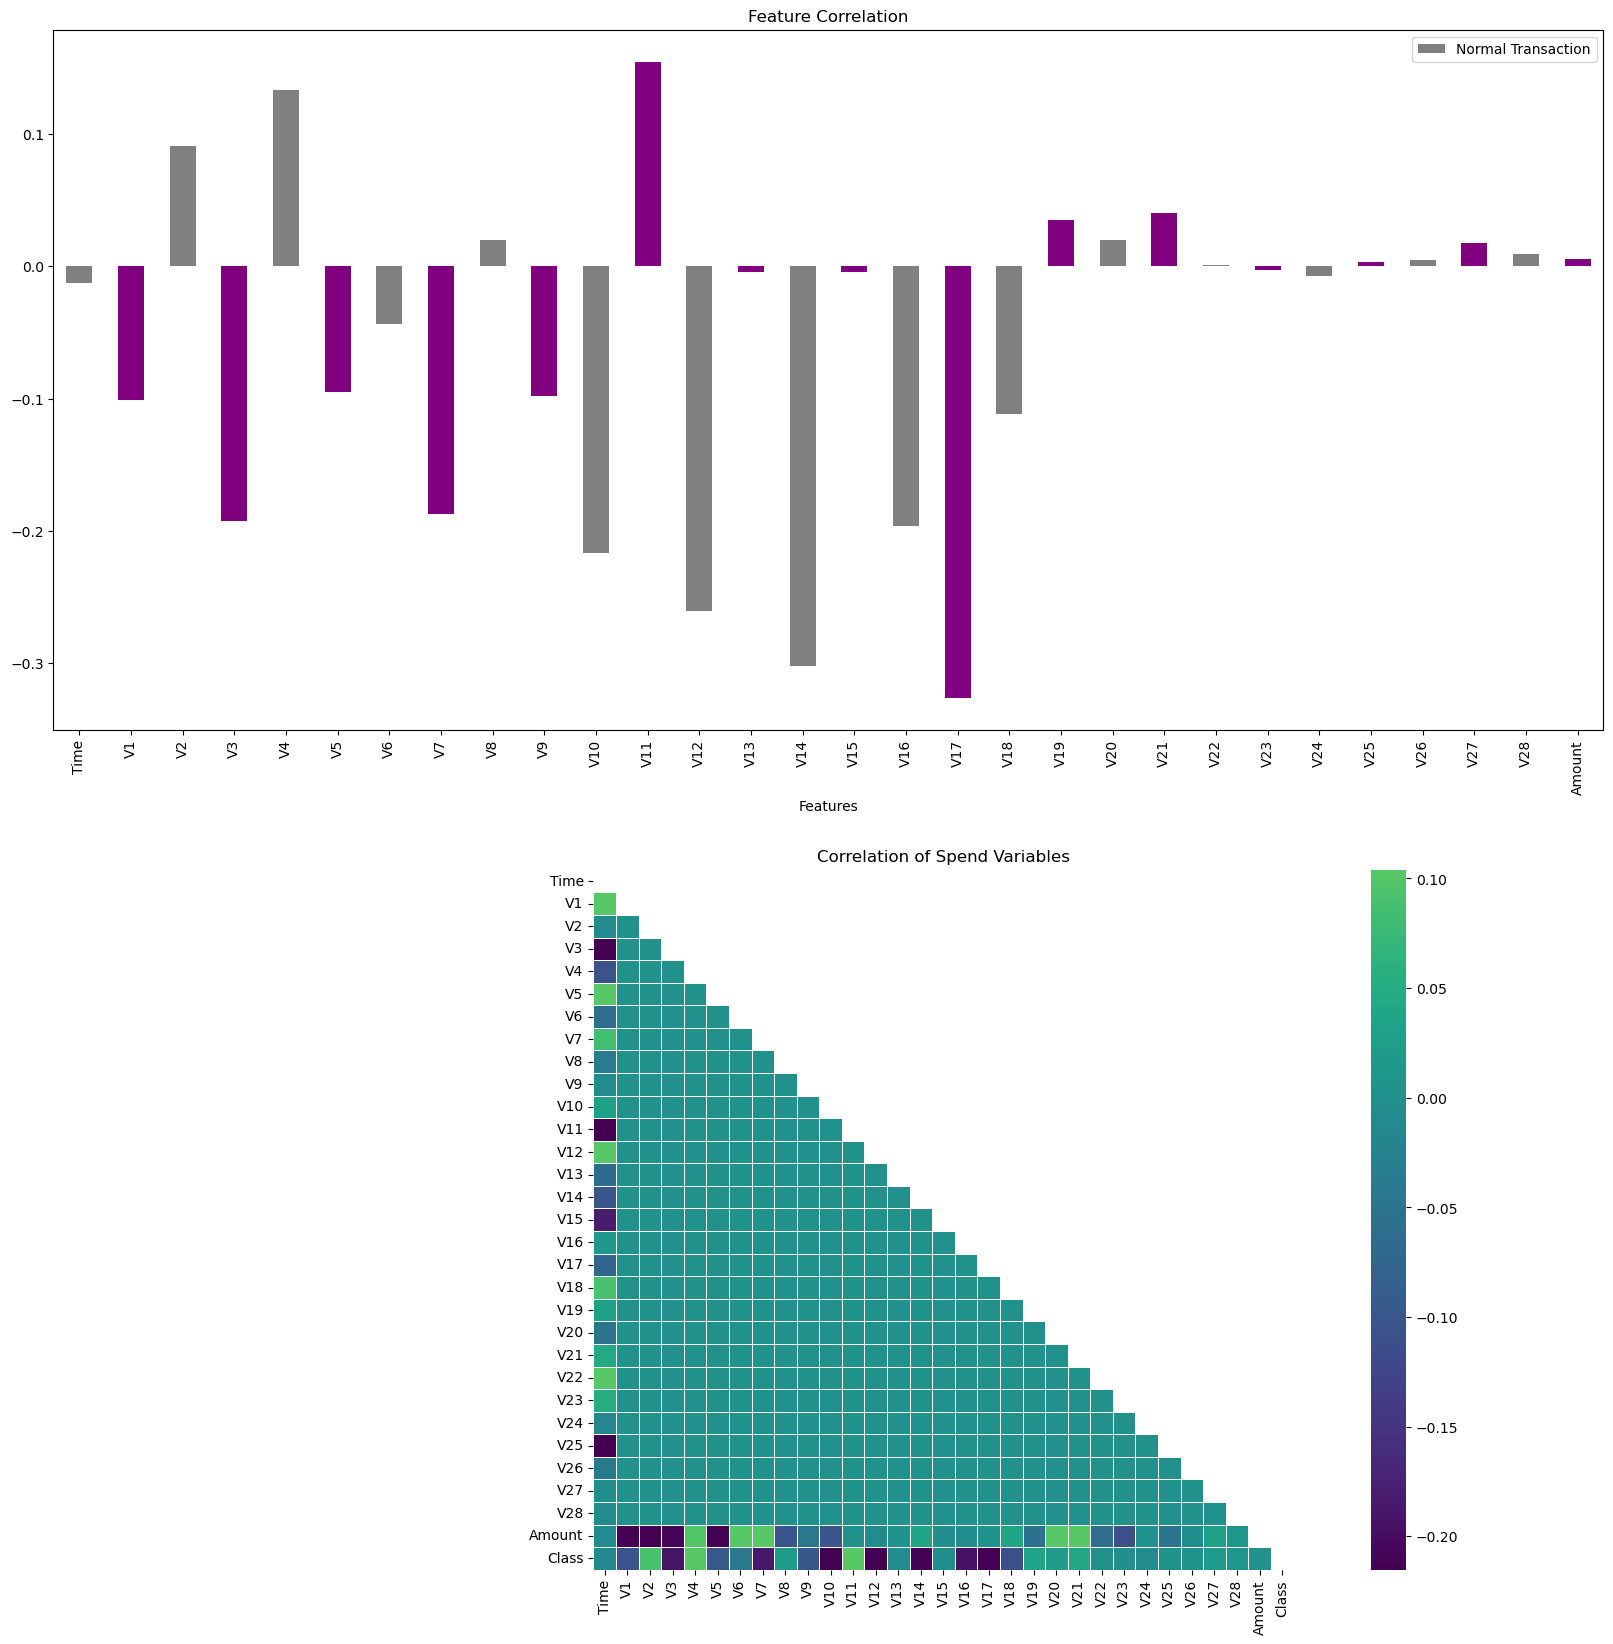

In [46]:
plot_correlation()

# Data Preprocessing

## Split up into train and test set

In [49]:
X = df.drop(["Class"], axis=1)
y = df["Class"]
print(f"Input data shape: {X.shape}")
print(f"Target data shape: {y.shape}")

Input data shape: (284807, 30)
Target data shape: (284807,)


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

print(f"Train shape: {X_train.shape}")
print(f"Test shape: {X_test.shape}")

Train shape: (227845, 30)
Test shape: (56962, 30)


# Build Base Model

In [60]:
lr = LogisticRegression(penalty="l2", random_state=42)

In [61]:
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [62]:
pred = lr.predict_proba(X_test)

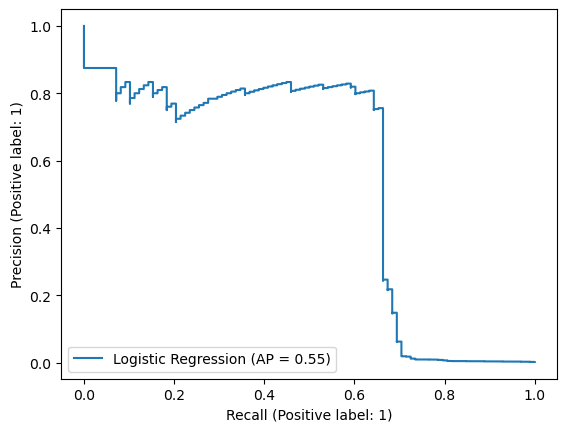

In [64]:
display = PrecisionRecallDisplay.from_estimator(
    lr, X_test, y_test, name="Logistic Regression"
)

# Build XGBoost Model

In [66]:
model = XGBClassifier()

In [69]:
kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

In [75]:
results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1', verbose=1,
                          n_jobs=4)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  2.0min finished


In [76]:
print(f"F1_score mean: {results.mean()}, F1_score std: {results.std()}")

F1_score mean: 0.8645190343066771, F1_score std: 0.032604259754605694


## Generate 5 model variations

In [78]:
colors = cycle(["purple", "orange", "gray", "blue", "green"])

In [82]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

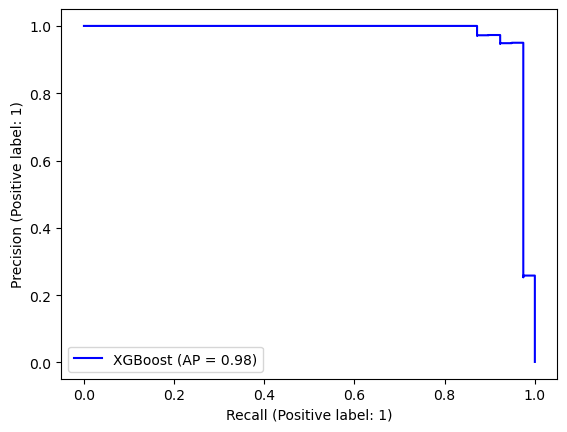

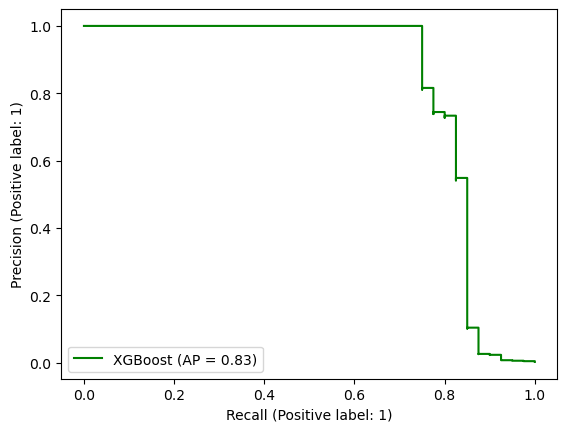

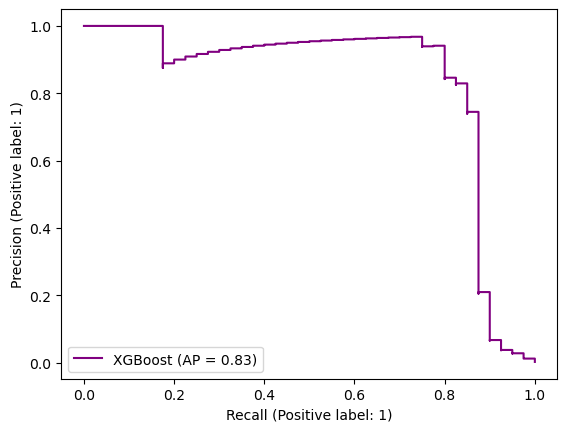

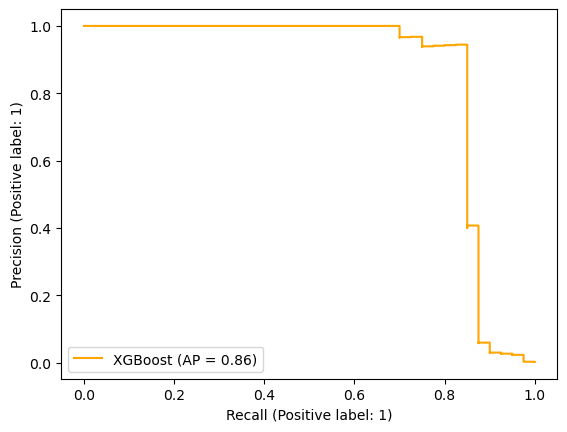

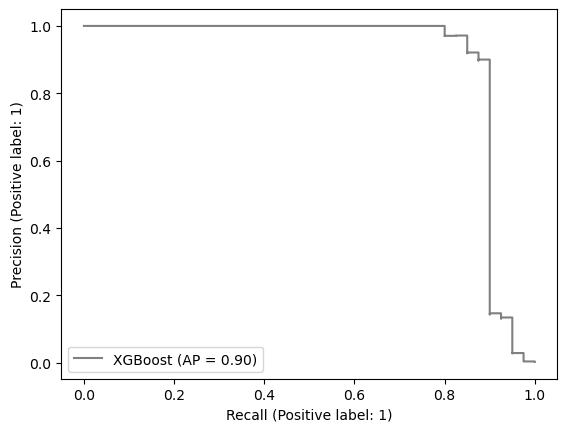

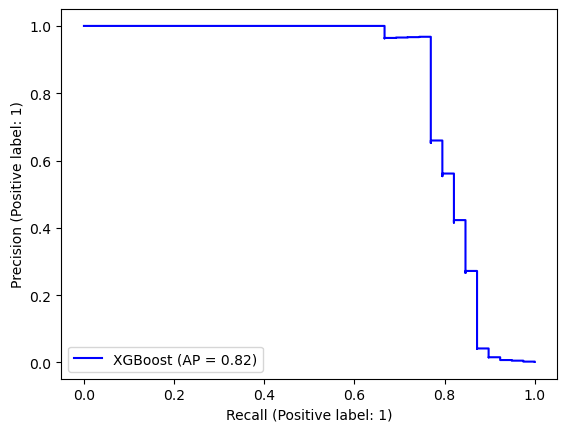

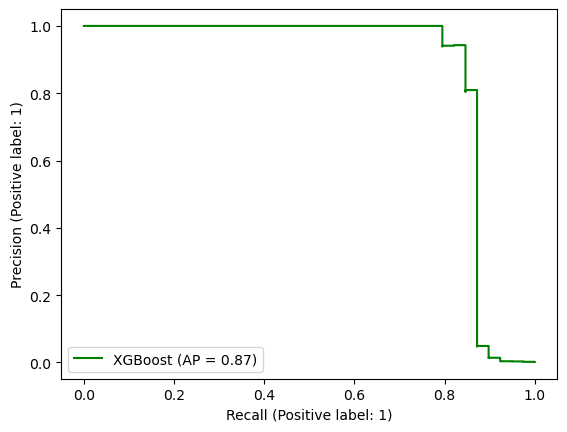

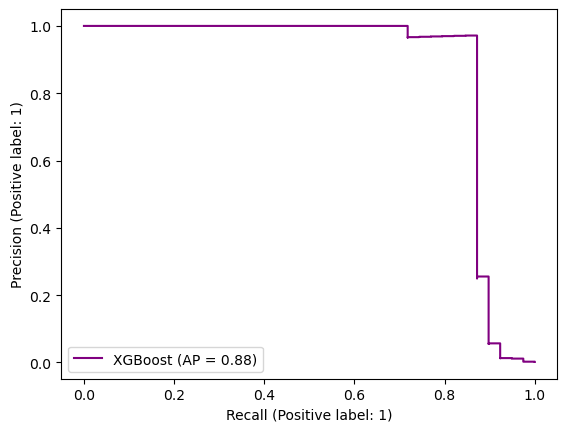

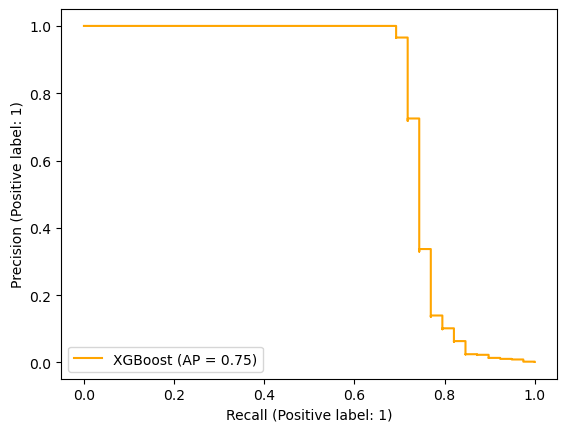

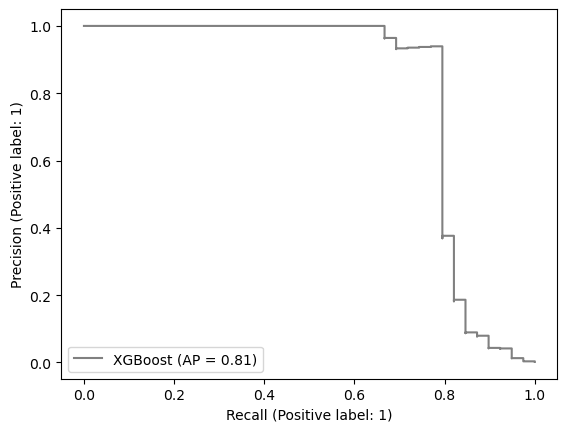

In [84]:
for (train, val), color in zip(kfold.split(X_train, y_train), colors):
    model.fit(X_train[train], y_train[train])

    display = PrecisionRecallDisplay.from_estimator(
        model, X_train[val], y_train[val], name="XGBoost", color=color
    )

plt.show()